In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
data2 = pd.read_csv("상업용 상대가격(기준=2015)all.csv")
data2

,YEAR,MONTH,RP(상대가격),GAS_PRICE(산업용도시가스),OIL_PRICE(원유정제처리제품)
0,1996,1,0.97,26.94,27.86
1,1996,2,0.93,26.94,29.04
2,1996,3,0.96,26.94,27.99
3,1996,4,0.94,26.94,28.74
4,1996,5,0.92,26.94,29.18
...,...,...,...,...,...
295,2020,8,0.86,72.93,84.71
296,2020,9,0.80,65.24,81.26
297,2020,10,0.76,59.16,78.13
298,2020,11,0.75,58.72,78.64


In [3]:
rp = data2['RP(상대가격)']
rp

0      0.97
1      0.93
2      0.96
3      0.94
4      0.92
       ... 
295    0.86
296    0.80
297    0.76
298    0.75
299    0.72
Name: RP(상대가격), Length: 300, dtype: float64

In [4]:
data = pd.read_csv('월별공급량및비중all.csv')
data["ID"] = pd.date_range("1996-01-01", "2020-12-01", freq="MS")
data

,YEAR,MONTH,도시가스(톤)_민수용,도시가스(톤)_산업용,도시가스(톤)_총합(민수용+산업용),민수용비중,산업용비중,ID
0,1996,1,605519.0,83809.0,689328.0,0.87842,0.12158,1996-01-01
1,1996,2,566323.0,70427.0,636750.0,0.88940,0.11060,1996-02-01
2,1996,3,477514.0,62652.0,540166.0,0.88401,0.11599,1996-03-01
3,1996,4,337794.0,47050.0,384844.0,0.87774,0.12226,1996-04-01
4,1996,5,184522.0,30709.0,215231.0,0.85732,0.14268,1996-05-01
...,...,...,...,...,...,...,...,...
295,2020,8,398661.0,457970.0,856631.0,0.46538,0.53462,2020-08-01
296,2020,9,380235.0,525619.0,905853.0,0.41975,0.58025,2020-09-01
297,2020,10,616682.0,600890.0,1217571.0,0.50649,0.49352,2020-10-01
298,2020,11,1093747.0,665901.0,1759648.0,0.62157,0.37843,2020-11-01


In [5]:
ind = data["도시가스(톤)_산업용"]
ind.index = data["ID"]
ind

ID
1996-01-01     83809.0
1996-02-01     70427.0
1996-03-01     62652.0
1996-04-01     47050.0
1996-05-01     30709.0
                ...   
2020-08-01    457970.0
2020-09-01    525619.0
2020-10-01    600890.0
2020-11-01    665901.0
2020-12-01    811928.0
Name: 도시가스(톤)_산업용, Length: 300, dtype: float64

In [6]:
rp.index = data['ID']
rp

ID
1996-01-01    0.97
1996-02-01    0.93
1996-03-01    0.96
1996-04-01    0.94
1996-05-01    0.92
              ... 
2020-08-01    0.86
2020-09-01    0.80
2020-10-01    0.76
2020-11-01    0.75
2020-12-01    0.72
Name: RP(상대가격), Length: 300, dtype: float64

In [7]:
ind = ind.to_frame()
ind.columns=['gas']
ind

,gas
ID,
1996-01-01,83809.0
1996-02-01,70427.0
1996-03-01,62652.0
1996-04-01,47050.0
1996-05-01,30709.0
...,...
2020-08-01,457970.0
2020-09-01,525619.0
2020-10-01,600890.0


In [8]:
ind['rp'] = rp
ind

,gas,rp
ID,,
1996-01-01,83809.0,0.97
1996-02-01,70427.0,0.93
1996-03-01,62652.0,0.96
1996-04-01,47050.0,0.94
1996-05-01,30709.0,0.92
...,...,...
2020-08-01,457970.0,0.86
2020-09-01,525619.0,0.80
2020-10-01,600890.0,0.76


array([<AxesSubplot:xlabel='ID'>, <AxesSubplot:xlabel='ID'>], dtype=object)

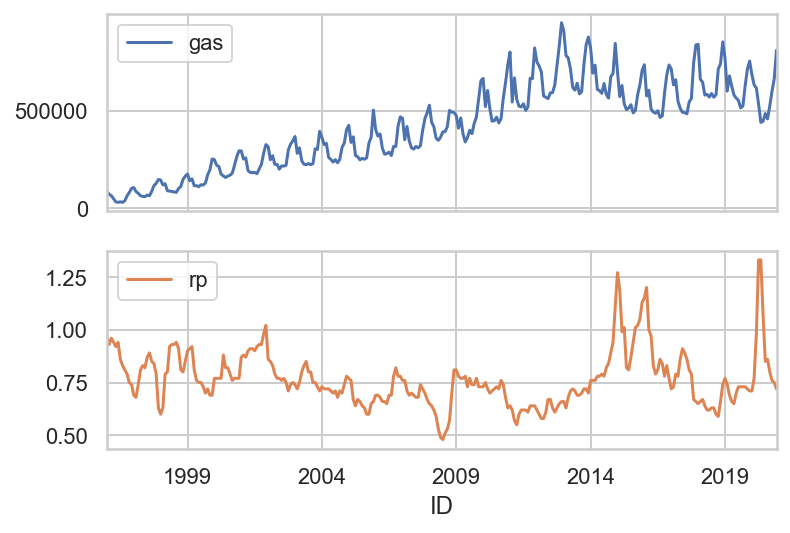

In [9]:
ind.plot(subplots=True)

In [10]:
from sklearn.model_selection import train_test_split
gas_train, gas_test, rp_train, rp_test = train_test_split(ind['gas'], ind['rp'], test_size=0.2, shuffle=False)
print(gas_train, gas_test, rp_train, rp_test)

ID
1996-01-01     83809.0
1996-02-01     70427.0
1996-03-01     62652.0
1996-04-01     47050.0
1996-05-01     30709.0
                ...   
2015-08-01    488926.0
2015-09-01    502257.0
2015-10-01    582921.0
2015-11-01    633643.0
2015-12-01    708636.0
Name: gas, Length: 240, dtype: float64 ID
2016-01-01    737007.0
2016-02-01    576168.0
2016-03-01    605263.0
2016-04-01    508759.0
2016-05-01    493899.0
2016-06-01    487473.0
2016-07-01    500368.0
2016-08-01    465488.0
2016-09-01    473692.0
2016-10-01    591924.0
2016-11-01    684233.0
2016-12-01    735859.0
2017-01-01    715626.0
2017-02-01    633160.0
2017-03-01    659824.0
2017-04-01    549691.0
2017-05-01    512652.0
2017-06-01    492596.0
2017-07-01    490124.0
2017-08-01    484551.0
2017-09-01    544947.0
2017-10-01    563796.0
2017-11-01    746759.0
2017-12-01    838623.0
2018-01-01    842024.0
2018-02-01    661919.0
2018-03-01    647226.0
2018-04-01    580667.0
2018-05-01    584369.0
2018-06-01    570856.0
2018-07-01  

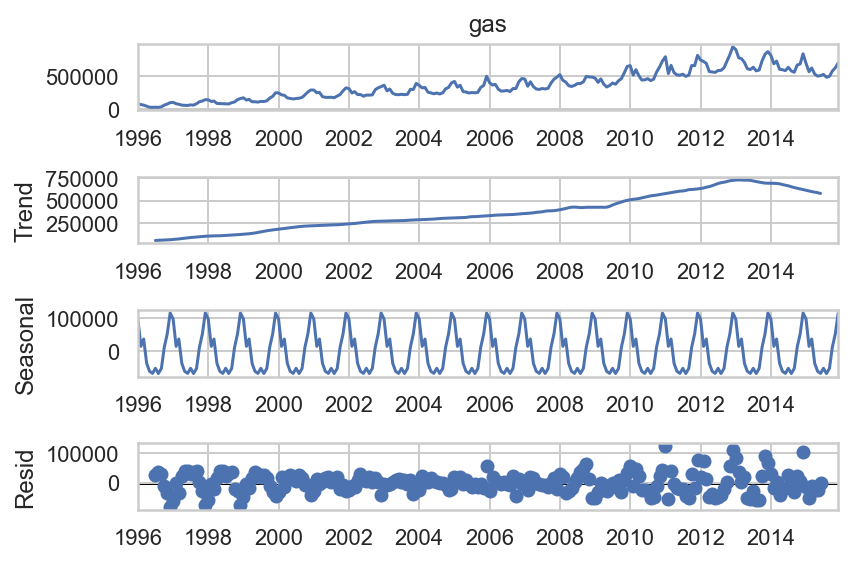

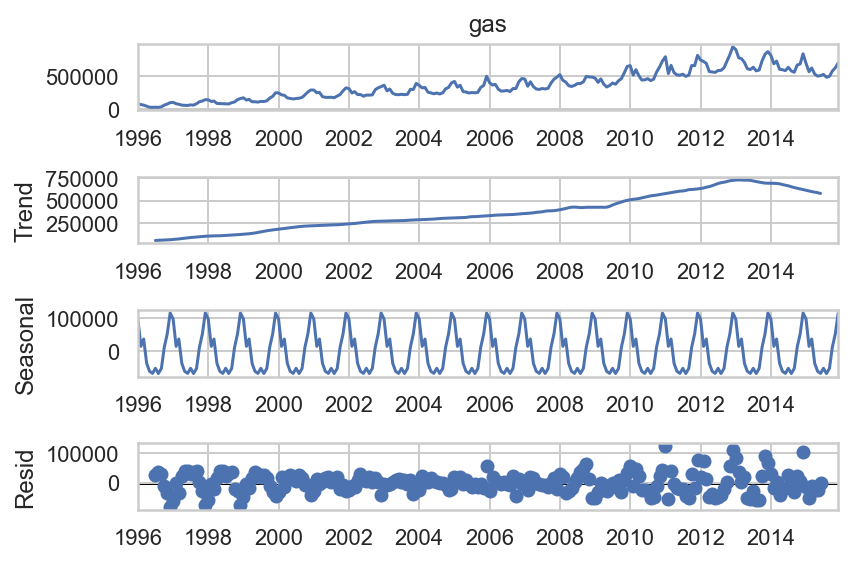

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(gas_train, model="additive")
decompose_data.plot()

<AxesSubplot:xlabel='ID'>

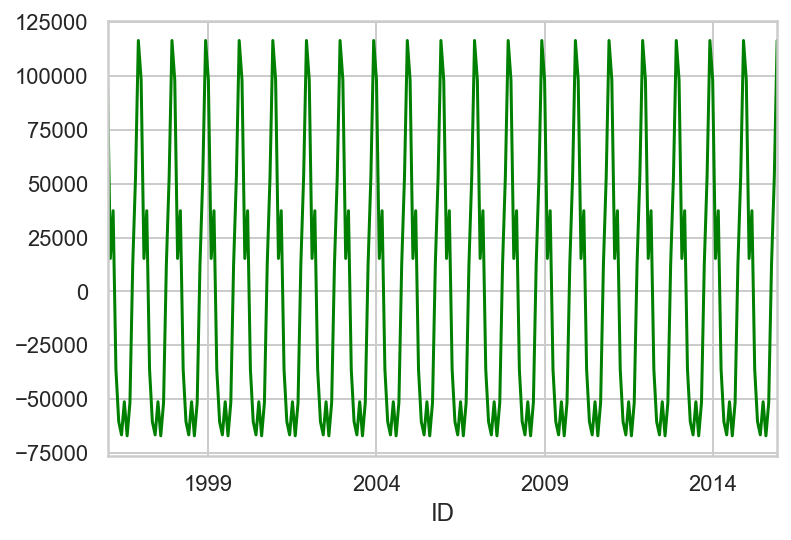

In [12]:
seasonality = decompose_data.seasonal
seasonality.plot(color='green')

In [13]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(gas_train, autolag='AIC')
print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num of Lags : ", dftest[2])
print("4. Num of Observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
    print("\t", key, ": ", val)
#p-value 0.05보다 크므로 비정상 시계열

1. ADF :  -1.5755928022176267
2. P-Value :  0.4958413712850975
3. Num of Lags :  14
4. Num of Observations used for ADF Regression and Critical Values Calculation :  225
5. Critical Values : 
	 1% :  -3.4597521044060353
	 5% :  -2.874472927517147
	 10% :  -2.5736628197530864


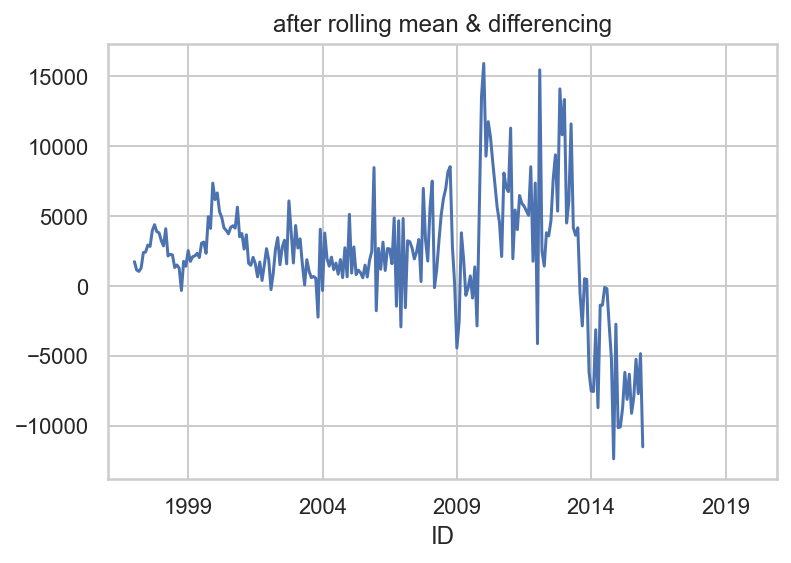

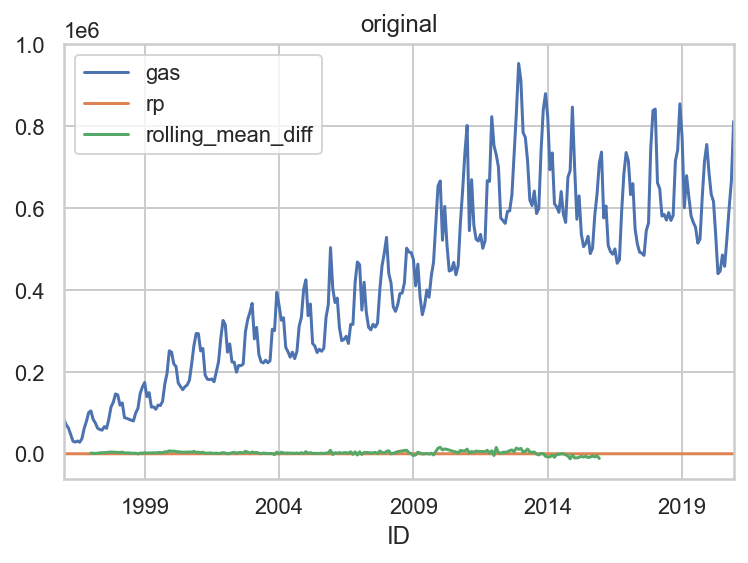

In [14]:
rolling_mean = gas_train.rolling(window=12).mean()
ind['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
ind['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
ind.plot(title='original');

In [15]:
dftest = adfuller(ind['rolling_mean_diff'].dropna(), autolag='AIC')
print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num of Lags : ", dftest[2])
print("4. Num of Observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
    print("\t", key, ": ", val)

1. ADF :  -0.5469371991067189
2. P-Value :  0.8825270412716792
3. Num of Lags :  15
4. Num of Observations used for ADF Regression and Critical Values Calculation :  212
5. Critical Values : 
	 1% :  -3.4615775784078466
	 5% :  -2.875271898983725
	 10% :  -2.5740891037735847


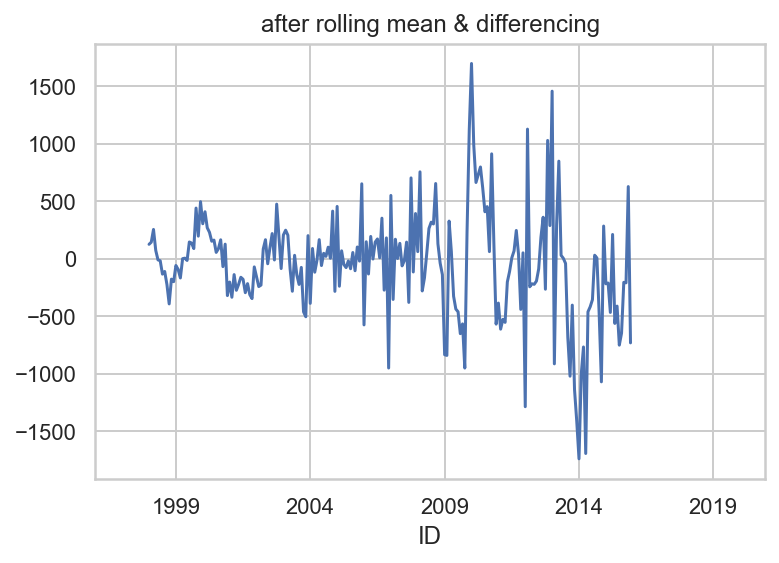

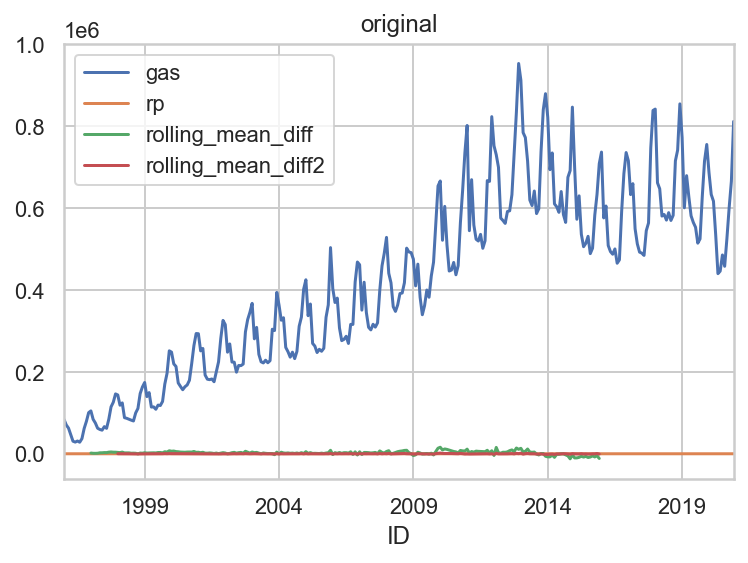

In [16]:
rolling_mean = ind['rolling_mean_diff'].rolling(window=12).mean()
ind['rolling_mean_diff2'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
ind['rolling_mean_diff2'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
ind.plot(title='original');

In [17]:
dftest = adfuller(ind['rolling_mean_diff2'].dropna(), autolag='AIC')
print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num of Lags : ", dftest[2])
print("4. Num of Observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
    print("\t", key, ": ", val)

1. ADF :  -2.5149278786982685
2. P-Value :  0.11188432995768371
3. Num of Lags :  15
4. Num of Observations used for ADF Regression and Critical Values Calculation :  200
5. Critical Values : 
	 1% :  -3.463476079125
	 5% :  -2.876102355
	 10% :  -2.574532225


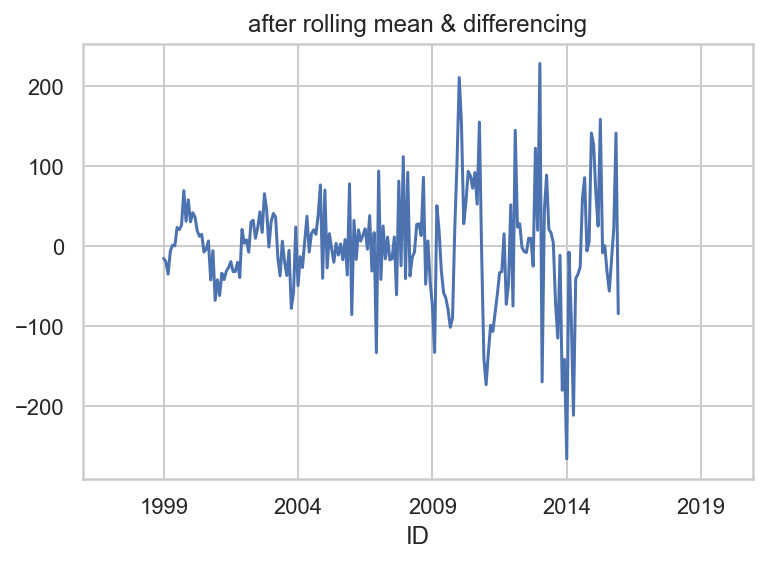

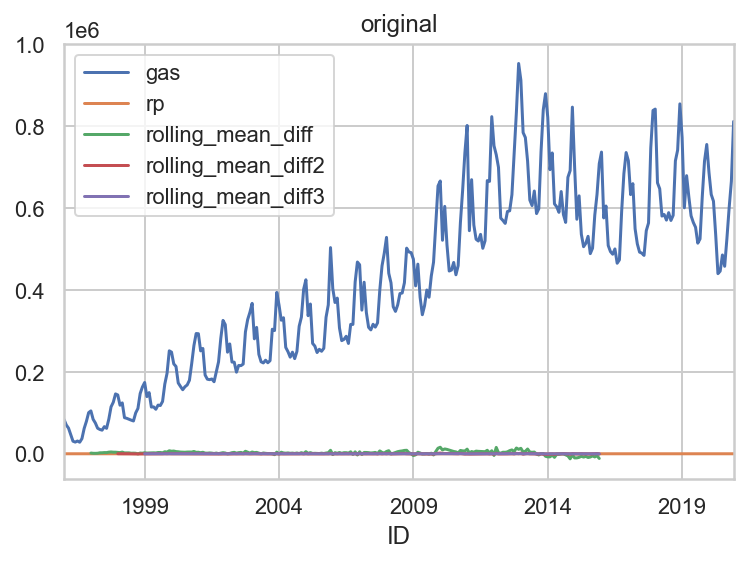

In [18]:
rolling_mean = ind['rolling_mean_diff2'].rolling(window=12).mean()
ind['rolling_mean_diff3'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
ind['rolling_mean_diff3'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
ind.plot(title='original');

In [19]:
dftest = adfuller(ind['rolling_mean_diff3'].dropna(), autolag='AIC')
print("1. ADF : ", dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num of Lags : ", dftest[2])
print("4. Num of Observations used for ADF Regression and Critical Values Calculation : ", dftest[3])
print("5. Critical Values : ")
for key, val in dftest[4].items():
    print("\t", key, ": ", val)

1. ADF :  -3.7060683028018144
2. P-Value :  0.004028603182578549
3. Num of Lags :  15
4. Num of Observations used for ADF Regression and Critical Values Calculation :  188
5. Critical Values : 
	 1% :  -3.465620397124192
	 5% :  -2.8770397560752436
	 10% :  -2.5750324547306476


In [20]:
ind.index = pd.DatetimeIndex(ind.index.values,
                               freq=ind.index.inferred_freq)

In [21]:
gas_train.index = pd.DatetimeIndex(gas_train.index.values, freq=gas_train.index.inferred_freq)
gas_train

1996-01-01     83809.0
1996-02-01     70427.0
1996-03-01     62652.0
1996-04-01     47050.0
1996-05-01     30709.0
                ...   
2015-08-01    488926.0
2015-09-01    502257.0
2015-10-01    582921.0
2015-11-01    633643.0
2015-12-01    708636.0
Freq: MS, Name: gas, Length: 240, dtype: float64

In [22]:
rp_train.index = pd.DatetimeIndex(rp_train.index.values, freq=rp_train.index.inferred_freq)
rp_train

1996-01-01    0.97
1996-02-01    0.93
1996-03-01    0.96
1996-04-01    0.94
1996-05-01    0.92
              ... 
2015-08-01    0.94
2015-09-01    1.01
2015-10-01    1.02
2015-11-01    1.05
2015-12-01    1.13
Freq: MS, Name: rp, Length: 240, dtype: float64

In [23]:
from pmdarima.arima import auto_arima
auto_arima_model = auto_arima(gas_train, exog=rp_train,
                              start_p=0, max_p=5, 
                              start_q=0, max_q=5, 
                              seasonal=True,
                              d=3, m=12,
                              trace=False,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=False)
auto_arima_model

ARIMA(order=(1, 3, 2), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [24]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(gas_train, exog=rp_train, order=(1,3,2), seasonal_order=(1,0,1,12))
results = model.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                  gas   No. Observations:                  240
Model:             SARIMAX(1, 3, 2)x(1, 0, [1], 12)   Log Likelihood               -2916.024
Date:                              Wed, 12 Oct 2022   AIC                           5846.048
Time:                                      01:08:13   BIC                           5870.325
Sample:                                  01-01-1996   HQIC                          5855.833
                                       - 12-01-2015                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
rp          -1.15e+05   1.08e+05     -1.063      0.288   -3.27e+05     9.7e+04
ar.L1         -0.3869      0.266     -1.452      0.146      -0.909       0.135
ma.L1         -1.9310      0.234     -8.244      0.000      -2.390      -1.472
ma.L2          0.9319      0.238      3.916      0.000       0.465       1.398
ar.S.L12       0.9197      0.128      7.167      0.000       0.668       1.171
ma.S.L12      -0.5285      0.341     -1.548      0.122      -1.198       0.141
sigma2       5.97e+09      0.677   8.82e+09      0.000    5.97e+09    5.97e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                40.44
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               3.05   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.11e+26. Standard errors may be unstable.
"""

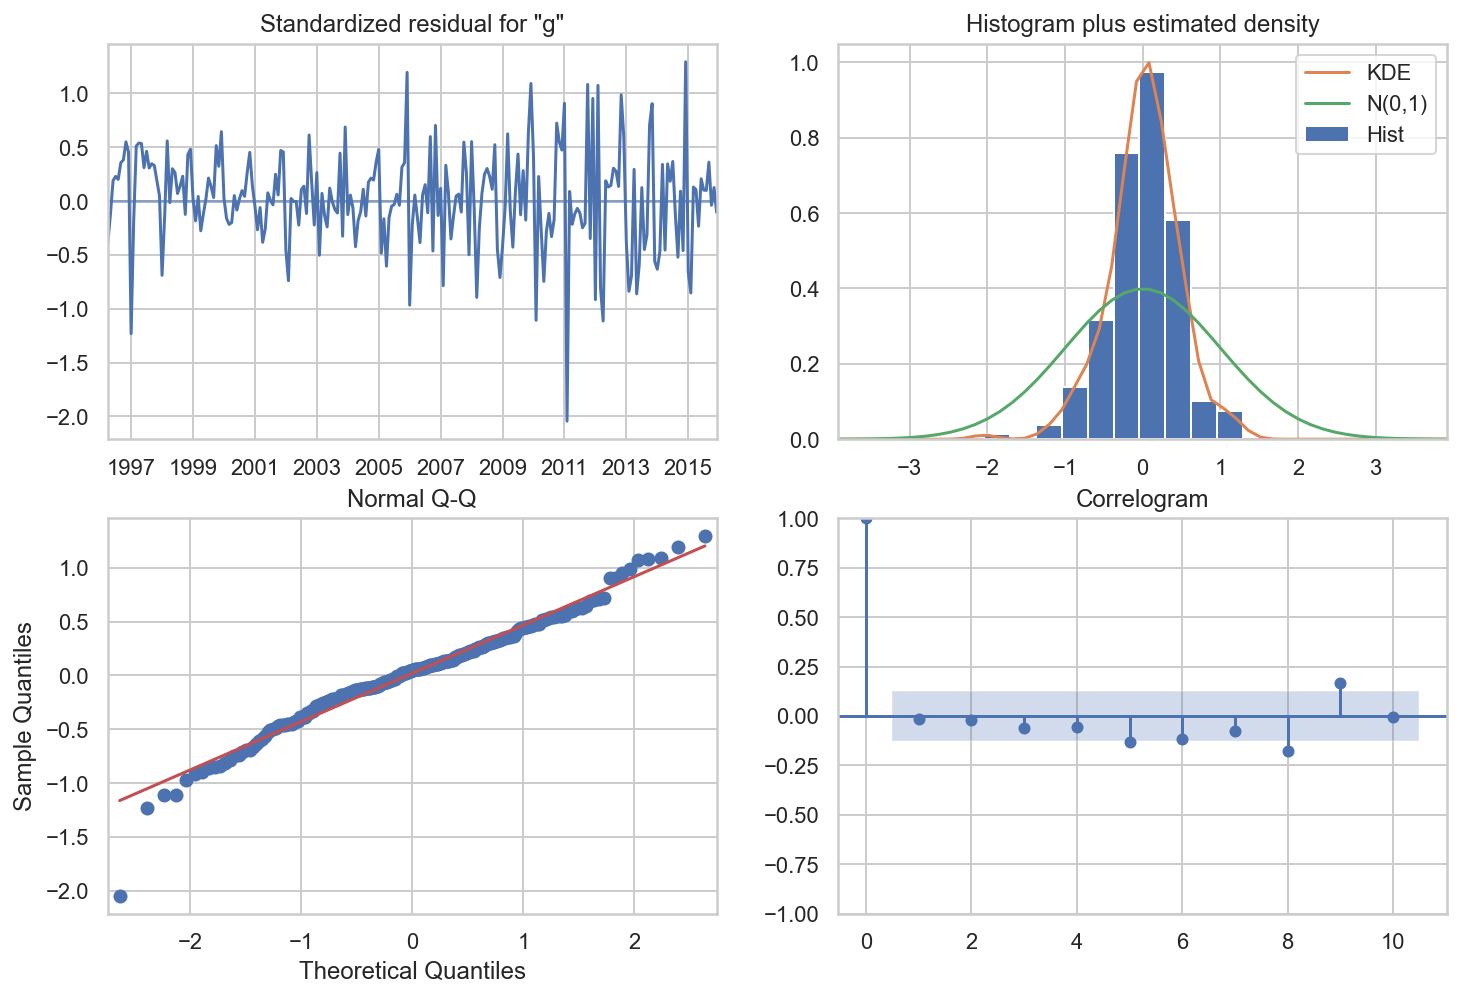

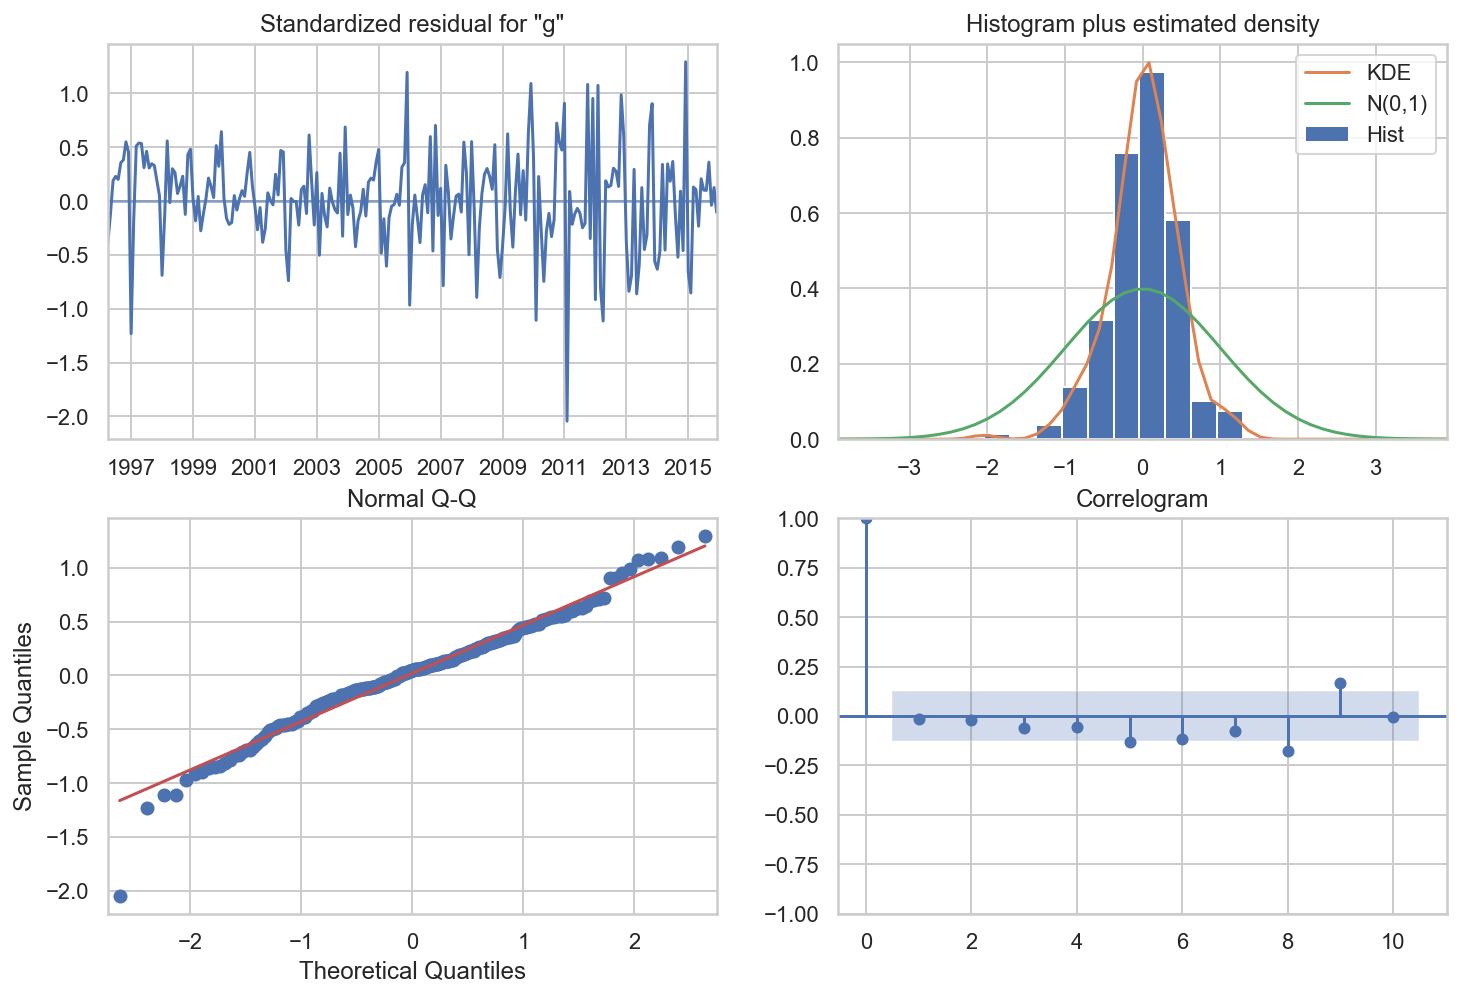

In [26]:
results.plot_diagnostics(figsize=(12,8))

<AxesSubplot:>

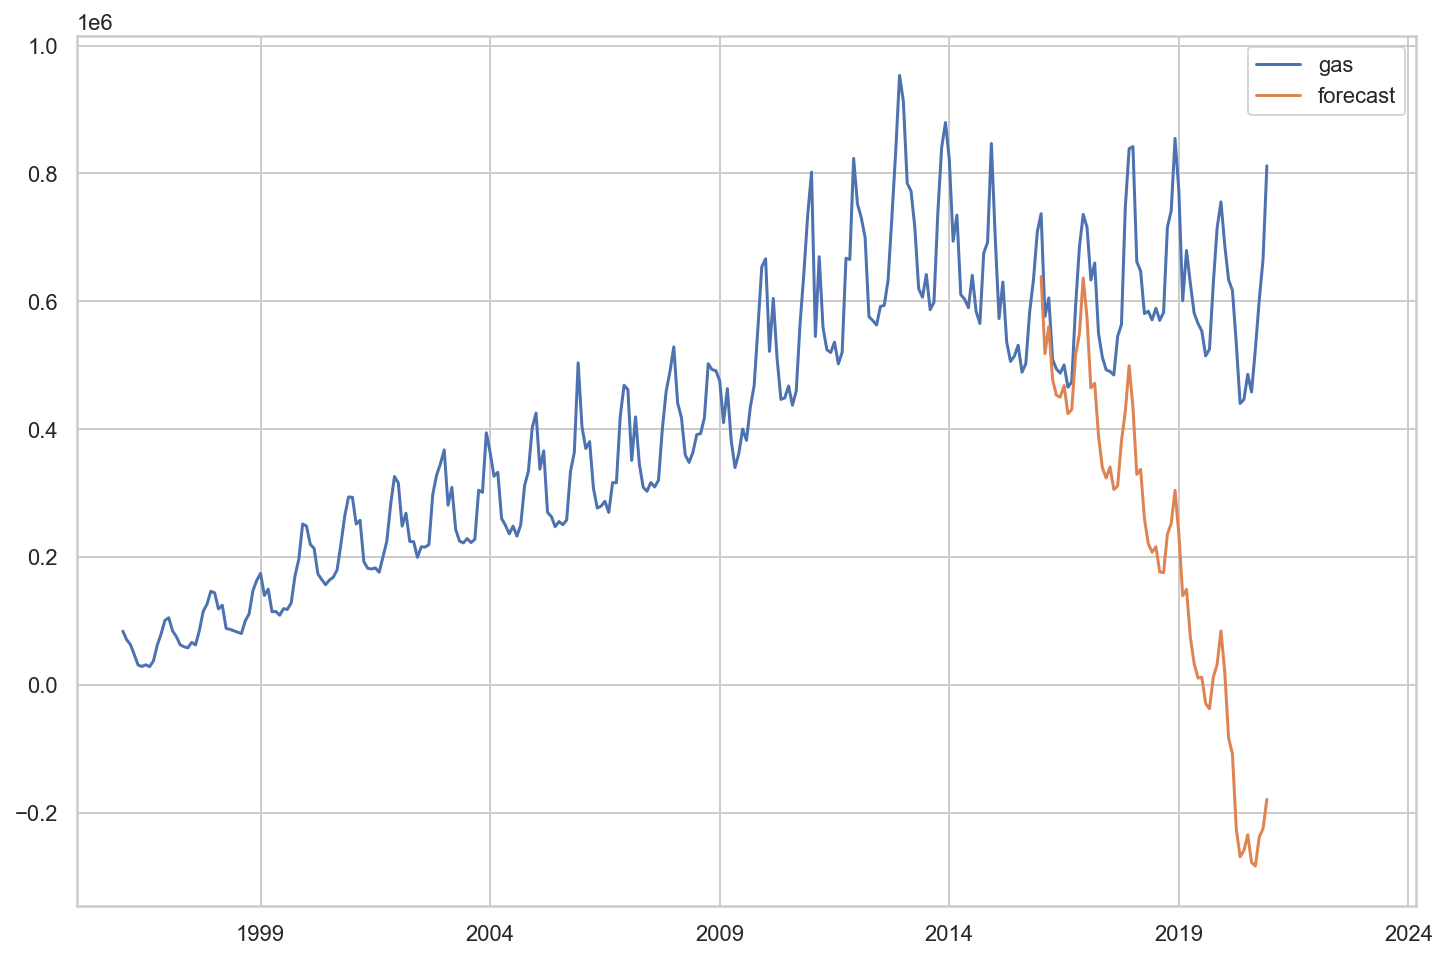

In [27]:
ind['forecast']=results.predict(start=240, end=299, dynamic=True, exog=rp_test)
ind[['gas','forecast']].plot(figsize=(12,8), xlim=[300,650])

In [28]:
from pandas.tseries.offsets import DateOffset
pred_date = [ind.index[-1] + DateOffset(months=x) for x in range(0,169)]

In [29]:
pred_date = pd.DataFrame(index=pred_date[1:], columns=ind.columns)
pred_date.head()

,gas,rp,rolling_mean_diff,rolling_mean_diff2,rolling_mean_diff3,forecast
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-01,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
ind = pd.concat([ind, pred_date])

In [33]:
ind['forecast'] = results.predict(start=240, end=469, dynamic=True)
ind[['gas', 'forecast']].plot(figsize=(12,8), xlim=[300,800])
#exog항을 추가하니 이 미래범위의 exog값이 없어서 오류나는듯함..?
#rp만으로 sarimax 돌려서 미래값 예측해서 넣어야하나?! 이게맞나,,,

ValueError: Out-of-sample operations in a model with a regression component require additional exogenous values via the `exog` argument.

In [34]:
ind

,gas,rp,rolling_mean_diff,rolling_mean_diff2,rolling_mean_diff3,forecast
1996-01-01,83809.0,0.97,NaN,NaN,NaN,NaN
1996-02-01,70427.0,0.93,NaN,NaN,NaN,NaN
1996-03-01,62652.0,0.96,NaN,NaN,NaN,NaN
1996-04-01,47050.0,0.94,NaN,NaN,NaN,NaN
1996-05-01,30709.0,0.92,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2034-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2034-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2034-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2034-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ind.to_csv("sarimax_ind.csv", mode='w')